# NYC Payroll Open Data Manipulation


## Project Overview
In this project we will use payroll data downloaded from NYC Open Data to answer specific questions.

## Data
As mentioned above, this data is from [NYC Open Data](https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e) and represents NYC employees’ salary and overtime pay data.  The following is from the data dictionary that has also been included in the download files for the reference:

```
Data is collected because of public interest in how the City’s budget is being spent on salary and overtime pay for all municipal employees. Data is input into the City's Personnel Management System (“PMS”) by the respective user Agencies. Each record represents the following statistics for every city employee: Agency, Last Name, First Name, Middle Initial, Agency Start Date, Work Location Borough, Job Title Description, Leave Status as of the close of the FY (June 30th), Base Salary, Pay Basis, Regular Hours Paid, Regular Gross Paid, Overtime Hours worked, Total Overtime Paid, and Total Other Compensation (i.e. lump sum and/or retro payments). This data can be used to analyze how the City's financial resources are allocated and how much of the City's budget is being devoted to overtime. The reader of this data should be aware that increments of salary increases received over the course of any one fiscal year will not be reflected. All that is captured, is the employee's final base and gross salary at the end of the fiscal year.

NOTE: As a part of FISA-OPA’s routine process for reviewing and releasing Citywide Payroll Data, data for some agencies (specifically NYC Police Department (NYPD) and the District Attorneys’ Offices (Manhattan, Kings, Queens, Richmond, Bronx, and Special Narcotics)) have been redacted since they are exempt from disclosure pursuant to the Freedom of Information Law, POL § 87(2)(f), on the ground that disclosure of the information could endanger the life and safety of the public servants listed thereon. They are further exempt from disclosure pursuant to POL § 87(2)(e)(iii), on the ground that any release of the information would identify confidential sources or disclose confidential information relating to a criminal investigation, and POL § 87(2)(e)(iv), on the ground that disclosure would reveal non-routine criminal investigative techniques or procedures.
```

In [1]:
# common imports
import pandas as pd
import numpy as np

In [2]:
# import data - use dtype argument due to large file size
nyc_full = pd.read_csv('NYC_Payroll_Data.csv', dtype={'Fiscal Year': 'int', 'Payroll Number': 'float', 'Agency Name': 'str',
                                                            'Last Name': 'str','First Name': 'str','Mid Init': 'str',
                                                            'Agency Start Date': 'str','Work Location Borough': 'str','Title Description': 'str',
                                                            'Leave Status as of June 30': 'str','Base Salary': 'float','Pay Basis': 'str',
                                                            'Regular Hours': 'float', 'Regular Gross Paid': 'float', 'OT Hours': 'float',
                                                            'Total OT Paid': 'float', 'Total Other Pay': 'float'})

In [3]:
nyc = nyc_full.copy()

In [4]:
# check information about DataFrame
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4496767 entries, 0 to 4496766
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Fiscal Year                 int32  
 1   Payroll Number              float64
 2   Agency Name                 object 
 3   Last Name                   object 
 4   First Name                  object 
 5   Mid Init                    object 
 6   Agency Start Date           object 
 7   Work Location Borough       object 
 8   Title Description           object 
 9   Leave Status as of June 30  object 
 10  Base Salary                 float64
 11  Pay Basis                   object 
 12  Regular Hours               float64
 13  Regular Gross Paid          float64
 14  OT Hours                    float64
 15  Total OT Paid               float64
 16  Total Other Pay             float64
dtypes: float64(7), int32(1), object(9)
memory usage: 566.1+ MB


In [5]:
# check first five rows of data
nyc.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


If we were to research the values in the DataFrame further, we would notice that there are some values in lowercase and most are listed in all uppercase.  Because of this, we run the function below that will transform all characters to uppercase to be consistent with the majority of the data.  

In [6]:
def upper_case(df):
    '''
    Takes as input the `nyc` DataFrame. 
    Then capitlizes each character in columns with "object" data type.
    '''
    # iterating over each column in the DataFrame
    for col in df.columns:
        # checking datatype of each column
        if df[col].dtype == 'object':
            # applying upper function on column
            df[col] = df[col].str.upper()

upper_case(nyc)

**Q1:** How many rows are contained in the full dataset?

In [7]:
print(f'There are {len(nyc.index)} rows in the full dataset.')

There are 4496767 rows in the full dataset.


**Q2:** How many individuals are represented using only the 2021 fiscal year data?

In [8]:
nyc_2021 = nyc[nyc['Fiscal Year'] == 2021]
print(f'There are {len(nyc_2021.index)} individuals represented in the 2021 fiscal year data.')

There are 573477 individuals represented in the 2021 fiscal year data.


**Q3:** Who had the highest base salary in 2021?  What was his/her base salary?  What Agency did he/she work for?  What was his/her title?

In [9]:
top_bs = nyc_2021.loc[nyc_2021['Base Salary'].idxmax()]

print(f'{top_bs["First Name"]} {top_bs["Mid Init"]}. {top_bs["Last Name"]} \
had the highest base salary in 2021.')

print(f'His base salary in 2021 was {top_bs["Base Salary"]}.')

print(f'He was working for {top_bs["Agency Name"]} in 2021.')

print(f'In 2021 his title was {top_bs["Title Description"]} of {top_bs["Agency Name"]}.')

GREGORY P. RUSS had the highest base salary in 2021.
His base salary in 2021 was 414707.0.
He was working for NYC HOUSING AUTHORITY in 2021.
In 2021 his title was CHAIR of NYC HOUSING AUTHORITY.


**Q4:** List the top 5 employees with the highest regular gross pay in 2021.

In [10]:
top5_rgp = nyc_2021.sort_values(by='Regular Gross Paid', ascending=False)[:5]
top5_rgp

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
3923291,2021,996.0,NYC HOUSING AUTHORITY,RUSS,GREGORY,P,08/12/2019,MANHATTAN,CHAIR,ACTIVE,414707.0,PER ANNUM,1820.0,413518.05,0.0,0.00,500.00
3923299,2021,15.0,OFFICE OF THE COMPTROLLER,DONE,ALEXIS,NaN,03/12/2012,MANHATTAN,PENSION INVESTMENT ADVISOR,ACTIVE,350000.0,PER ANNUM,1820.0,349014.96,0.0,0.00,0.00
3923304,2021,67.0,ADMIN FOR CHILDREN'S SVCS,OKORO,EDWARD,NaN,06/23/1996,MANHATTAN,CHILD PROTECTIVE SPECIALIST,ON SEPARATION LEAVE,60351.0,PER ANNUM,1820.0,332518.52,4.0,661.91,-440.49
3923321,2021,8.0,OFFICE OF THE ACTUARY,CHAN,SHERRY,S,05/18/2015,MANHATTAN,CHIEF ACTUARY,ACTIVE,311885.0,PER ANNUM,1820.0,311007.12,0.0,0.00,-5974.80
3923329,2021,15.0,OFFICE OF THE COMPTROLLER,HADDAD,MICHAEL,D,01/11/2016,MANHATTAN,DIRECTOR OF INVESTMENTS,ACTIVE,300000.0,PER ANNUM,1820.0,299155.64,0.0,0.00,0.00


**Q5:** Which employee had the highest total OT paid in 2021?

In [11]:
top_otp = nyc_2021.loc[nyc_2021['Total OT Paid'].idxmax()]
print(f'{top_otp["First Name"]} {top_otp["Last Name"]} had the highest total OT paid in 2021.')

ROBERT PROCIDA had the highest total OT paid in 2021.


**Q6:** Which employee that was still active as of June 30th had the highest total other pay in 2021?

In [12]:
act = nyc_2021[nyc_2021['Leave Status as of June 30'] == 'ACTIVE']
top_op_act = act.loc[act['Total Other Pay'].idxmax()]

print(f'{top_op_act["First Name"]} {top_op_act["Mid Init"]}. {top_op_act["Last Name"]} \
was an active employee (as of June 30th 2021) who had the highest total other pay.')

VITO J. MUSTACIUOLO was an active employee (as of June 30th 2021) who had the highest total other pay.


**Q7:**  According to the Data Dictionary, an employee's total gross pay is equal to the sum of their regular gross pay, total overtime pay, and total other pay.  Create a column called `Total Gross Paid` in the `nyc` DataFrame that sums those three respective pay columns for each employee.  

Which 10 individuals had the highest total gross pay in 2021? 

In [13]:
nyc['Total Gross Paid'] = nyc['Regular Gross Paid'] + nyc['Total OT Paid'] + nyc['Total Other Pay']
nyc_2021 = nyc[nyc['Fiscal Year'] == 2021]
top10_tgp = nyc_2021.sort_values(by='Total Gross Paid', ascending=False)[:10]
top10_tgp

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Total Gross Paid
3923290,2021,996.0,NYC HOUSING AUTHORITY,MUSTACIUOLO,VITO,J,02/26/2018,MANHATTAN,EXECUTIVE DIRECTOR,ACTIVE,258000.00,PER ANNUM,1820.0,257260.30,0.00,0.00,258000.00,515260.30
3923291,2021,996.0,NYC HOUSING AUTHORITY,RUSS,GREGORY,P,08/12/2019,MANHATTAN,CHAIR,ACTIVE,414707.00,PER ANNUM,1820.0,413518.05,0.00,0.00,500.00,414018.05
3923292,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,MCGROARTY,MICHAEL,NaN,10/06/2014,QUEENS,STATIONARY ENGINEER,ACTIVE,508.80,PER DAY,2080.0,132288.00,2374.75,238829.13,40105.00,411222.13
3923293,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,HALLAHAN,PATRICK,M,02/26/2018,BROOKLYN,STATIONARY ENGINEER,ACTIVE,508.80,PER DAY,2080.0,132288.00,2115.25,218628.18,56616.07,407532.25
3923294,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,PETTIT,PATRICK,J,08/02/2010,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,PER DAY,2080.0,132288.00,2152.75,218694.96,38611.82,389594.78
3923295,2021,816.0,DEPT OF HEALTH/MENTAL HYGIENE,TELEHANY,STEPHEN,M,01/16/2007,QUEENS,STATIONARY ENGINEER,ACTIVE,508.80,PER DAY,2080.0,132288.00,1876.25,192296.19,51160.20,375744.39
3923296,2021,462.0,GUTTMAN COMMUNITY COLLEGE,EVENBECK,SCOTT,E,04/17/2011,MANHATTAN,PRESIDENT,CEASED,228000.00,PER ANNUM,980.0,122427.81,0.00,0.00,244495.20,366923.01
3923297,2021,56.0,POLICE DEPARTMENT,NaN,NaN,NaN,07/16/1984,MANHATTAN,CAPTAIN DETAILED AS CHIEF OF TRAINING,CEASED,241116.00,PER ANNUM,400.0,46222.47,0.00,0.00,312126.91,358349.38
3923298,2021,996.0,NYC HOUSING AUTHORITY,PROCIDA,ROBERT,NaN,04/13/1987,BRONX,SUPERVISOR PLUMBER,ACTIVE,387.03,PER DAY,1820.0,100627.80,2249.50,248749.72,7215.34,356592.86
3923299,2021,15.0,OFFICE OF THE COMPTROLLER,DONE,ALEXIS,NaN,03/12/2012,MANHATTAN,PENSION INVESTMENT ADVISOR,ACTIVE,350000.00,PER ANNUM,1820.0,349014.96,0.00,0.00,0.00,349014.96


**Q8:** What is the average, median, and standard deviation for total gross pay for all individuals in 2021?

In [14]:
avg_tgp = nyc_2021['Total Gross Paid'].mean()
med_tgp = nyc_2021['Total Gross Paid'].median()
std_tgp = nyc_2021['Total Gross Paid'].std()

print(f'Average TGP for 2021: ${round(avg_tgp)}')
print(f'Median TGP for 2021: ${round(med_tgp)}')
print(f'STD TGP for 2021: ${round(std_tgp)}')

Average TGP for 2021: $52018
Median TGP for 2021: $43359
STD TGP for 2021: $50730


**Q9:** How many different agencies are represented in the 2021 data?  What are the names of the agencies?

In [15]:
agency = nyc_2021['Agency Name'].unique().tolist()
agency.sort()
print(f'There are {len(agency)} different agencies represented in the 2021 data.')
print('Their names are given in the following list:')
agency

There are 156 different agencies represented in the 2021 data.
Their names are given in the following list:


["ADMIN FOR CHILDREN'S SVCS",
 'ADMIN TRIALS AND HEARINGS',
 'BOARD OF CORRECTION',
 'BOARD OF ELECTION',
 'BOARD OF ELECTION POLL WORKERS',
 'BOROUGH PRESIDENT-BRONX',
 'BOROUGH PRESIDENT-BROOKLYN',
 'BOROUGH PRESIDENT-QUEENS',
 'BOROUGH PRESIDENT-STATEN IS',
 'BRONX COMMUNITY BOARD #1',
 'BRONX COMMUNITY BOARD #10',
 'BRONX COMMUNITY BOARD #11',
 'BRONX COMMUNITY BOARD #12',
 'BRONX COMMUNITY BOARD #2',
 'BRONX COMMUNITY BOARD #3',
 'BRONX COMMUNITY BOARD #4',
 'BRONX COMMUNITY BOARD #5',
 'BRONX COMMUNITY BOARD #6',
 'BRONX COMMUNITY BOARD #7',
 'BRONX COMMUNITY BOARD #8',
 'BRONX COMMUNITY BOARD #9',
 'BRONX DISTRICT ATTORNEY',
 'BROOKLYN COMMUNITY BOARD #1',
 'BROOKLYN COMMUNITY BOARD #10',
 'BROOKLYN COMMUNITY BOARD #11',
 'BROOKLYN COMMUNITY BOARD #12',
 'BROOKLYN COMMUNITY BOARD #13',
 'BROOKLYN COMMUNITY BOARD #14',
 'BROOKLYN COMMUNITY BOARD #15',
 'BROOKLYN COMMUNITY BOARD #16',
 'BROOKLYN COMMUNITY BOARD #17',
 'BROOKLYN COMMUNITY BOARD #18',
 'BROOKLYN COMMUNITY BOARD #2',

**Q10:** What agencies had the highest and lowest median total gross pay in 2021?

In [16]:
agency_med = nyc_2021.groupby('Agency Name')['Total Gross Paid'].median()

print(f'Agency with the highest median TGP in 2021: {agency_med.idxmax()}')
print(f'Agency with the lowest median TGP in 2021: {agency_med.idxmin()}')

Agency with the highest median TGP in 2021: FINANCIAL INFO SVCS AGENCY
Agency with the lowest median TGP in 2021: DEPARTMENT OF JUVENILE JUSTICE


**Q11:** How much did Mayor Bill de Blasio make in 2021 (total gross pay)?  Who had the highest total gross pay in the Mayor's office? When was Mayor Bill de Blasio's start date in the Mayor's office?   

In [17]:
mayor_office = nyc_2021[nyc_2021['Agency Name'] == 'OFFICE OF THE MAYOR']
mayor = mayor_office[mayor_office['Last Name'] == 'DE BLASIO']
mayor_tgp = mayor['Total Gross Paid'].values[0]
print(f'The NYC mayor had TGP of ${mayor_tgp} in 2021.')

top_tgp_mo = mayor_office.loc[mayor_office['Total Gross Paid'].idxmax()]
print(f'{top_tgp_mo["First Name"]} {top_tgp_mo["Mid Init"]}. {top_tgp_mo["Last Name"]} \
had the highest TGP in the Office of the Mayor (in 2021).')

mayor_sd = mayor['Agency Start Date'].values[0]
print(f"Mayor Bill de Blasio's start date in the Mayor's office was {mayor_sd}.")

The NYC mayor had TGP of $253064.89 in 2021.
DEAN A. FULEIHAN had the highest TGP in the Office of the Mayor (in 2021).
Mayor Bill de Blasio's start date in the Mayor's office was 01/01/2014.


**Q12:** How much was the total cumulative gross pay for all NYC employees in 2021? Total cumulative OT pay? What was the percentage of overtime pay as compared to total gross pay for all data in 2021?

In [18]:
sum_tgp = nyc_2021['Total Gross Paid'].sum()
print(f"The total cumulative GP for all NYC employees in 2021 was ${round(sum_tgp)}.")

sum_otp = nyc_2021['Total OT Paid'].sum()
print(f"The total cumulative OTP for all NYC employees in 2021 was ${round(sum_otp)}.")

print(f"The ratio of cumulative OTP vs. cumulative TGP in 2021 was {round((sum_otp*100)/sum_tgp, 2)}%.")

The total cumulative GP for all NYC employees in 2021 was $29831122863.
The total cumulative OTP for all NYC employees in 2021 was $1796557248.
The ratio of cumulative OTP vs. cumulative TGP in 2021 was 6.02%.


**Q13:** What was the average base salary per work location in 2021?

In [19]:
work_loc_avg_bs = nyc_2021.groupby('Work Location Borough')['Base Salary'].mean().round()
work_loc_avg_bs

Work Location Borough
ALBANY            91296.0
BRONX             55290.0
BROOKLYN          59289.0
DELAWARE          65365.0
DUTCHESS          60964.0
GREENE            72366.0
MANHATTAN         43044.0
NASSAU            29930.0
ORANGE            57403.0
OTHER            120125.0
PUTNAM            63960.0
QUEENS            58847.0
RICHMOND          58242.0
SCHOHARIE         70127.0
SULLIVAN          72212.0
ULSTER            79806.0
WASHINGTON DC    133560.0
WESTCHESTER       68430.0
Name: Base Salary, dtype: float64

**Q14:** For the work location that has the highest average base salary above, which individual in that location makes the highest base salary?

In [20]:
top_wl_avg_bs = nyc_2021[nyc_2021['Work Location Borough'] == work_loc_avg_bs.idxmax()]
top_wl_top_bs = top_wl_avg_bs.loc[top_wl_avg_bs['Base Salary'].idxmax()]
print(f'{top_wl_top_bs["First Name"]} {top_wl_top_bs["Mid Init"]}. {top_wl_top_bs["Last Name"]} \
had the highest base salary in the working location with the highest avg. base salary (in 2021).')

REBECCA K. KAGAN STERNHELL had the highest base salary in the working location with the highest avg. base salary (in 2021).


**Q15:** Group the 2021 data by work location and then agency name.  What are the five largest median base salaries from that grouped data? 

In [21]:
wl_an_med_bs = nyc_2021.groupby(['Work Location Borough', 'Agency Name'])['Base Salary'].median()
top5_wl_an_med_bs = wl_an_med_bs.sort_values(ascending=False)[:5]
top5_wl_an_med_bs

Work Location Borough  Agency Name                  
WASHINGTON DC          DEPT OF INFO TECH & TELECOMM     177904.0
BRONX                  DEPT OF INFO TECH & TELECOMM     147213.0
                       COMMUNITY COLLEGE (LAGUARDIA)    147000.0
WASHINGTON DC          LAW DEPARTMENT                   142057.0
ALBANY                 OFFICE OF THE MAYOR              130000.0
Name: Base Salary, dtype: float64

**Q16:** How has the cumulative total gross pay for all individuals changed over time?

In [22]:
nyc_yearly = nyc.groupby('Fiscal Year')
yearly_sum_tgp = nyc_yearly['Total Gross Paid'].sum()
yearly_sum_tgp

Fiscal Year
2014    2.286248e+10
2015    2.433409e+10
2016    2.551812e+10
2017    2.714594e+10
2018    2.754932e+10
2019    2.951697e+10
2020    3.041857e+10
2021    2.983112e+10
Name: Total Gross Paid, dtype: float64

#### Q16 analysis:

Cumulative TGP for all the individual has been (almost always) gradually increasing over the time. The lowest cumulative TGP was in 2014 equal to $\$22.8$ billions, while the highest was in 2020 equal to $\$30.4$ billions. 

The lowest increment was from the year 2017 to 2018 equal to $\$400$ millions, and the highest was from 2018 to 2019 equal to $\$2$ billions.

There was only one decrement of cumulative TGP in the 2014-2021 period, from 2020 to 2021 equal to $-\$600$ millions. 


**Q17:** How has the total number of employees for each fiscal year changed over time?

In [23]:
#number of employees per year
nyc_yearly.size()

Fiscal Year
2014    509525
2015    577880
2016    544817
2017    562266
2018    546161
2019    592431
2020    590210
2021    573477
dtype: int64

#### Q17 analysis:

The number of employees has both increased and decreased (almost) equal number of times over the years. The lowest number of employees was in 2014 equal to 509 525, while the highest was in 2019 equal to 592 431. 

The lowest increment was from the year 2016 to 2017 equal to around 18 000 employees, and the highest was from 2014 to 2015 equal to around 68 000 employees.

There smallest decrement was in the period from 2019 to 2020 equal to around -2 000 employes, and the highest decrement was from 2015-2016 with around -33 000 employees.

**Q18:** Who are the 2 top base salary employees per work location borough for 2021?

In [24]:
def top2_per_wl(salary_type):
    top2_wl_idx = nyc_2021.groupby('Work Location Borough')[salary_type].nlargest(n=2).index
    return nyc_2021.set_index(['Work Location Borough', nyc_2021.index]).loc[top2_wl_idx]

top2_per_wl(salary_type='Base Salary')

Fiscal Year  Payroll Number  \
Work Location Borough                                        
ALBANY                3930828         2021             2.0   
                      3953487         2021             2.0   
BRONX                 3923416         2021           468.0   
                      3923748         2021            56.0   
BROOKLYN              3923653         2021            57.0   
                      3923660         2021           858.0   
DELAWARE              3929538         2021           826.0   
                      3966341         2021           826.0   
DUTCHESS              3937611         2021           826.0   
                      3936167         2021           826.0   
GREENE                4136985         2021           826.0   
                      4000228         2021           826.0   
MANHATTAN             3923291         2021           996.0   
                      3923347         2021           742.0   
NASSAU                4036733         2021           740.0   
                      4048096         2021           740.0   
ORANGE                4144128         2021           740.0   
OTHER                 3923751         2021           742.0   
                      3951510         2021           742.0   
PUTNAM                3974829         2021           826.0   
                      4038808         2021           826.0   
QUEENS                3923360         2021           464.0   
                      3923371         2021           469.0   
RICHMOND              3923551         2021            56.0   
                      3923822         2021            57.0   
SCHOHARIE             3945224         2021           826.0   
                      3977095         2021           826.0   
SULLIVAN              3924073         2021           826.0   
                      3928269         2021           826.0   
ULSTER                4058362         2021           826.0   
                      3935296         2021           826.0   
WASHINGTON DC         3932324         2021             2.0   
                      4315554         2021           858.0   
WESTCHESTER           3928363         2021           826.0   
                      3929807         2021           826.0   

                                                  Agency Name  \
Work Location Borough                                           
ALBANY                3930828             OFFICE OF THE MAYOR   
                      3953487             OFFICE OF THE MAYOR   
BRONX                 3923416      COMMUNITY COLLEGE (HOSTOS)   
                      3923748               POLICE DEPARTMENT   
BROOKLYN              3923653                 FIRE DEPARTMENT   
                      3923660    DEPT OF INFO TECH & TELECOMM   
DELAWARE              3929538  DEPT OF ENVIRONMENT PROTECTION   
                      3966341  DEPT OF ENVIRONMENT PROTECTION   
DUTCHESS              3937611  DEPT OF ENVIRONMENT PROTECTION   
                      3936167  DEPT OF ENVIRONMENT PROTECTION   
GREENE                4136985  DEPT OF ENVIRONMENT PROTECTION   
                      4000228  DEPT OF ENVIRONMENT PROTECTION   
MANHATTAN             3923291           NYC HOUSING AUTHORITY   
                      3923347          DEPT OF ED PEDAGOGICAL   
NASSAU                4036733   DEPARTMENT OF EDUCATION ADMIN   
                      4048096   DEPARTMENT OF EDUCATION ADMIN   
ORANGE                4144128   DEPARTMENT OF EDUCATION ADMIN   
OTHER                 3923751          DEPT OF ED PEDAGOGICAL   
                      3951510          DEPT OF ED PEDAGOGICAL   
PUTNAM                3974829  DEPT OF ENVIRONMENT PROTECTION   
                      4038808  DEPT OF ENVIRONMENT PROTECTION   
QUEENS                3923360  COMMUNITY COLLEGE (QUEENSBORO)   
                      3923371   COMMUNITY COLLEGE (LAGUARDIA)   
RICHMOND              3923551               POLICE DEPARTMENT   
                      3923822                 

**Q19:** Who are the 2 top total gross paid employees per borough for 2021?

In [25]:
top2_per_wl(salary_type='Total Gross Paid')

Fiscal Year  Payroll Number  \
Work Location Borough                                        
ALBANY                3930828         2021             2.0   
                      3951660         2021           826.0   
BRONX                 3923298         2021           996.0   
                      3923300         2021           996.0   
BROOKLYN              3923293         2021           816.0   
                      3923301         2021           816.0   
DELAWARE              3929538         2021           826.0   
                      3955029         2021           826.0   
DUTCHESS              3930036         2021           826.0   
                      3935067         2021           826.0   
GREENE                3948802         2021           826.0   
                      4000228         2021           826.0   
MANHATTAN             3923290         2021           996.0   
                      3923291         2021           996.0   
NASSAU                4036733         2021           740.0   
                      4048096         2021           740.0   
ORANGE                4144128         2021           740.0   
OTHER                 3923426         2021           742.0   
                      3923530         2021           742.0   
PUTNAM                3960872         2021           826.0   
                      3974829         2021           826.0   
QUEENS                3923292         2021           816.0   
                      3923295         2021           816.0   
RICHMOND              3923379         2021           827.0   
                      3923420         2021            57.0   
SCHOHARIE             3945224         2021           826.0   
                      3977095         2021           826.0   
SULLIVAN              3924073         2021           826.0   
                      3928269         2021           826.0   
ULSTER                3933808         2021           826.0   
                      3934220         2021           826.0   
WASHINGTON DC         3932324         2021             2.0   
                      3953011         2021            25.0   
WESTCHESTER           3926492         2021           826.0   
                      3926668         2021           826.0   

                                                  Agency Name  \
Work Location Borough                                           
ALBANY                3930828             OFFICE OF THE MAYOR   
                      3951660  DEPT OF ENVIRONMENT PROTECTION   
BRONX                 3923298           NYC HOUSING AUTHORITY   
                      3923300           NYC HOUSING AUTHORITY   
BROOKLYN              3923293   DEPT OF HEALTH/MENTAL HYGIENE   
                      3923301   DEPT OF HEALTH/MENTAL HYGIENE   
DELAWARE              3929538  DEPT OF ENVIRONMENT PROTECTION   
                      3955029  DEPT OF ENVIRONMENT PROTECTION   
DUTCHESS              3930036  DEPT OF ENVIRONMENT PROTECTION   
                      3935067  DEPT OF ENVIRONMENT PROTECTION   
GREENE                3948802  DEPT OF ENVIRONMENT PROTECTION   
                      4000228  DEPT OF ENVIRONMENT PROTECTION   
MANHATTAN             3923290           NYC HOUSING AUTHORITY   
                      3923291           NYC HOUSING AUTHORITY   
NASSAU                4036733   DEPARTMENT OF EDUCATION ADMIN   
                      4048096   DEPARTMENT OF EDUCATION ADMIN   
ORANGE                4144128   DEPARTMENT OF EDUCATION ADMIN   
OTHER                 3923426          DEPT OF ED PEDAGOGICAL   
                      3923530          DEPT OF ED PEDAGOGICAL   
PUTNAM                3960872  DEPT OF ENVIRONMENT PROTECTION   
                      3974829  DEPT OF ENVIRONMENT PROTECTION   
QUEENS                3923292   DEPT OF HEALTH/MENTAL HYGIENE   
                      3923295   DEPT OF HEALTH/MENTAL HYGIENE   
RICHMOND              3923379        DEPARTMENT OF SANITATION   
                      3923420                 

**Q20:** For 2021, what percentage of individuals earned income per annum, per day and per hour?

In [26]:
pay_basis = nyc_2021['Pay Basis'].value_counts(normalize=True)
pay_basis

PER ANNUM          0.599672
PER DAY            0.240341
PER HOUR           0.156756
PRORATED ANNUAL    0.003231
Name: Pay Basis, dtype: float64

#### Q20 answer:

For 2021, 59.97% of individuals earned their incom per annum, 24.03% per day, and 15.68% per hour.

**Q21:** What is the average total gross pay broken down by the categories in the `Pay Basis` column for 2021?

In [27]:
pb_avg = nyc_2021.groupby('Pay Basis')['Total Gross Paid'].mean().round()
pb_avg

Pay Basis
PER ANNUM          78625.0
PER DAY            12463.0
PER HOUR           11223.0
PRORATED ANNUAL    35335.0
Name: Total Gross Paid, dtype: float64

**Q22:** Create a pivot table using the median of total gross pay with the index by agency name and columns broken down by pay basis category.

In [28]:
nyc_pivot = pd.pivot_table(data=nyc, values='Total Gross Paid', index='Agency Name',
                          columns='Pay Basis', aggfunc=np.median, margins=True)
nyc_pivot

Pay Basis,PER ANNUM,PER DAY,PER HOUR,PRORATED ANNUAL,All
Agency Name,,,,,
ADMIN FOR CHILDREN'S SVCS,63820.190,115830.580,5492.295,NaN,63663.890
ADMIN TRIALS AND HEARINGS,55490.500,65795.105,28201.850,NaN,37206.710
BOARD OF CORRECTION,66263.995,NaN,NaN,NaN,66263.995
BOARD OF CORRECTIONS,60042.470,NaN,NaN,NaN,60042.470
BOARD OF ELECTION,55180.300,NaN,14585.030,NaN,37035.145
...,...,...,...,...,...
STATEN ISLAND COMMUNITY BD #3,64494.630,NaN,NaN,NaN,64494.630
TAX COMMISSION,100457.425,NaN,13157.480,25604.700,78020.330
TAXI & LIMOUSINE COMMISSION,48566.750,65981.310,30615.490,NaN,46040.220


**Q23:** What positions (grouped by titles) pay the most based on the median total gross pay in 2021?  Show the top 10.

In [29]:
pos_med_tgp = nyc_2021.groupby('Title Description')['Total Gross Paid'].median().round()
top10_pos_med_tgp = pos_med_tgp.sort_values(ascending=False)[:10]
top10_pos_med_tgp

Title Description
PENSION INVESTMENT ADVISOR                      349015.0
CHAIR                                           326111.0
CHIEF ACTUARY                                   305032.0
CAPTAIN DETAILED AS CHIEF OF TRAINING           297703.0
FIRST DEPUTY MAYOR                              284742.0
PRESIDENT                                       275458.0
DIRECTOR OF  INVESTMENTS                        264254.0
CAPTAIN DETAILED AS CHIEF OF RISK MANAGEMENT    254051.0
MAYOR                                           253065.0
CHANCELLOR                                      251873.0
Name: Total Gross Paid, dtype: float64

**Q24:** Create a set of boxplots that show the total gross pay for all the employees of each of the various work location boroughs.

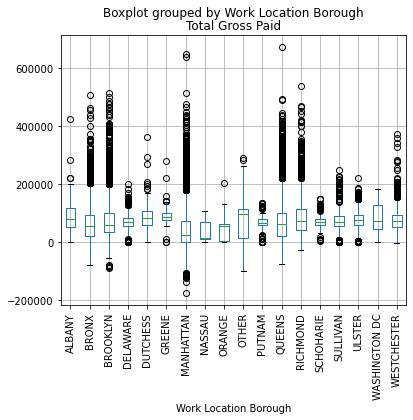

In [30]:
boxplt = nyc.boxplot(column='Total Gross Paid', by='Work Location Borough', rot=90,
                    figsize=(6, 5))
boxplt;

**Q25:** What are the top 10 agencies that have the most total number of overtime hours for 2021?  What are the top 10 agencies that have the highest average number of overtime hours?

In [31]:
agency_sum_oth = nyc_2021.groupby('Agency Name')['OT Hours'].sum()
top10_ag_sum_oth = agency_sum_oth.sort_values(ascending=False)[:10]
top10_ag_sum_oth

Agency Name
POLICE DEPARTMENT                 10815884.93
FIRE DEPARTMENT                    8220712.59
DEPARTMENT OF SANITATION           4206474.56
DEPARTMENT OF CORRECTION           3323294.05
NYC HOUSING AUTHORITY              2686245.50
HRA/DEPT OF SOCIAL SERVICES        1276660.51
DEPARTMENT OF TRANSPORTATION       1074099.24
DEPT OF HEALTH/MENTAL HYGIENE       867652.73
DEPT OF ENVIRONMENT PROTECTION      679410.40
ADMIN FOR CHILDREN'S SVCS           539092.21
Name: OT Hours, dtype: float64

In [32]:
agency_avg_oth = nyc_2021.groupby('Agency Name')['OT Hours'].mean().round(2)
top10_ag_avg_oth = agency_avg_oth.sort_values(ascending=False)[:10]
top10_ag_avg_oth

Agency Name
BOARD OF ELECTION                454.59
FIRE DEPARTMENT                  431.56
DEPARTMENT OF SANITATION         347.56
DEPARTMENT OF CORRECTION         265.18
DEPT. OF HOMELESS SERVICES       195.48
NYC HOUSING AUTHORITY            186.97
POLICE DEPARTMENT                183.29
DEPT OF CITYWIDE ADMIN SVCS      176.67
DEPARTMENT OF TRANSPORTATION     172.38
DEPT OF HEALTH/MENTAL HYGIENE    111.98
Name: OT Hours, dtype: float64

**Q26:** Attempt to do this in one line of code by using `agg`.  For the 2021 data, groupby the agency name and get the mean for the base salary, the median for the total overtime paid, and the standard deviation for the total gross paid.

In [33]:
agency_agg_stats = nyc_2021.groupby('Agency Name').agg({'Base Salary':'mean',
                                                        'Total OT Paid':'median',
                                                        'Total Gross Paid':'std'}).round(2)
agency_agg_stats

,Base Salary,Total OT Paid,Total Gross Paid
Agency Name,,,
ADMIN FOR CHILDREN'S SVCS,68928.30,21.95,32124.44
ADMIN TRIALS AND HEARINGS,42774.32,0.00,38677.47
BOARD OF CORRECTION,94507.13,0.00,41924.54
BOARD OF ELECTION,41241.89,13800.16,40142.72
BOARD OF ELECTION POLL WORKERS,1.01,0.00,2131.20
...,...,...,...
STATEN ISLAND COMMUNITY BD #2,54442.35,0.00,60292.12
STATEN ISLAND COMMUNITY BD #3,76387.00,0.00,23567.01
TAX COMMISSION,88848.10,0.00,51740.42


**Q27:** What is the average base salary for anyone with `DATABASE` in their title description for 2021?  

In [34]:
nyc_td_bs = nyc_2021[['Title Description', 'Base Salary']].dropna()
td_db = nyc_td_bs[nyc_td_bs['Title Description'].str.contains('DATABASE')]
td_db_avg_bs = td_db['Base Salary'].mean()
print(f"The average base salary for anyone with DATABASE in their title description for 2021 \
is ${td_db_avg_bs}.")

The average base salary for anyone with DATABASE in their title description for 2021 is $121565.0.


**Q28:** Select only the 2021 individuals that get paid on a `per Annum` basis. 

In [35]:
nyc_per_an = nyc_2021[nyc_2021['Pay Basis'] == 'PER ANNUM']
ag_per_an_bs= nyc_per_an.groupby('Agency Name')['Base Salary']
ag_per_an_bs_range = ag_per_an_bs.apply(lambda x: x.max() - x.min())
ag_per_an_bs_range

Agency Name
ADMIN FOR CHILDREN'S SVCS        210651.0
ADMIN TRIALS AND HEARINGS        198426.0
BOARD OF CORRECTION              149900.0
BOARD OF ELECTION                204388.0
BOROUGH PRESIDENT-BRONX          178898.0
                                   ...   
STATEN ISLAND COMMUNITY BD #2         0.0
STATEN ISLAND COMMUNITY BD #3     44770.0
TAX COMMISSION                   164966.0
TAXI & LIMOUSINE COMMISSION      211598.0
TEACHERS RETIREMENT SYSTEM       199491.0
Name: Base Salary, Length: 148, dtype: float64

**Q29:** For 2021, determine what work location and agency combination (group by work location, then by agency) has an average base salary below `$100,000` but above `$90,000`.  How many fall into this category?  

In [36]:
wl_ag = nyc_2021.groupby(['Work Location Borough', 'Agency Name'])
wl_ag_avg_bs_cond = wl_ag.filter(lambda x: 90000 < x['Base Salary'].mean() < 100000)

print(f"There are {len(wl_ag_avg_bs_cond.index)} falling into this category.")
print()
wl_ag_cond = wl_ag_avg_bs_cond.groupby(['Work Location Borough', 'Agency Name'])
print('The combinations of Work Location and Agency Name corresponding to the given condition \
are:')
list(wl_ag_cond.indices.keys())

There are 103780 falling into this category.

The combinations of Work Location and Agency Name corresponding to the given condition are:


[('BRONX', 'DISTRICT ATTORNEY-SPECIAL NARC'),
 ('BROOKLYN', 'BROOKLYN COMMUNITY BOARD #8'),
 ('BROOKLYN', 'MAYORS OFFICE OF CONTRACT SVCS'),
 ('MANHATTAN', 'BOARD OF CORRECTION'),
 ('MANHATTAN', 'CONFLICTS OF INTEREST BOARD'),
 ('MANHATTAN', 'DEPT OF ED PEDAGOGICAL'),
 ('MANHATTAN', 'EQUAL EMPLOY PRACTICES COMM'),
 ('MANHATTAN', 'MAYORS OFFICE OF CONTRACT SVCS'),
 ('MANHATTAN', 'NYC FIRE PENSION FUND'),
 ('MANHATTAN', 'OFFICE OF MANAGEMENT & BUDGET'),
 ('MANHATTAN', 'TAX COMMISSION'),
 ('QUEENS', 'DEPT. OF DESIGN & CONSTRUCTION'),
 ('RICHMOND', 'DISTRICT ATTORNEY-SPECIAL NARC')]